In [1]:
import warnings as _wrn
_wrn.filterwarnings('always')

In [2]:
import sys as _sys
import pickle as _pkl
import itertools as _itr

import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt
import pandas as _pnd

%load_ext autoreload
%autoreload 2
%matplotlib inline

_plt.style.use('ggplot')

In [3]:
_sys.path.append('../')
import eQTLseq as _assoc

In [4]:
PARS = _pnd.read_table('../data/pars.txt', sep=',')
GENO = _nmp.loadtxt('../data/1000G_chr7_100K_200K_005pc_5pc.txt', dtype='int')
MAF = GENO.sum(0) / (2 * GENO.shape[0])

In [ ]:
def fcn(n_samples=2000, n_markers=1000, n_genes=1000, pattern=(1, 1, 0, 0), size=8, pois=0., out=('S',0,5,10)):
    n_samples_max, n_markers_max = GENO.shape
    n_genes_max, _ = PARS.shape

    assert n_samples <= n_samples_max
    assert n_genes <= n_genes_max
    assert n_markers <= n_markers_max
    
    G = _assoc.simulate_genotypes(MAF, n_samples, n_markers)['G']
    
    idxs = _rnd.choice(n_genes_max, n_genes, replace=False)
    mu = PARS['mu'].values[idxs]
    phi = PARS['phi'].values[idxs]
    
    pheno = _assoc.simulate_eQTLs(G, mu, phi, pattern=pattern, size=size, pois=pois, out=out)

    _plt.figure(figsize = (15,10));
    _plt.subplot(2,2,1); _plt.loglog(pheno['mu'], pheno['mu'] + pheno['mu']**2 * pheno['phi'], '.'); _plt.xlabel('mean'); _plt.ylabel('variance');
    _plt.subplot(2,2,2); _plt.hist(_nmp.log(pheno['Z'].ravel()+1), 100); _plt.xlabel('first sample');
    _plt.subplot(2,2,3); _plt.vlines(range(pheno['beta'].size), 0, pheno['beta'].ravel()); 
    _plt.axhline(linestyle='--', color='k'); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
    G_norm = (G - _nmp.mean(G, 0)) / _nmp.std(G, 0)
    tmp = _nmp.exp(G_norm.dot(pheno['beta'].T))
    _plt.subplot(2,2,4); _plt.vlines(range(tmp.size), 1, tmp.ravel()); 
    _plt.axhline(linestyle='--', color='k'); _plt.xlabel('samples x genes'); _plt.ylabel('fold change')

#     _plt.subplot(2,2,4); _plt.imshow(pheno['beta'], cmap=_plt.cm.gray); _plt.xlabel('markers'); _plt.ylabel('genes')

    _plt.tight_layout()
    
    return {'G': G, **pheno}

##
data = fcn()

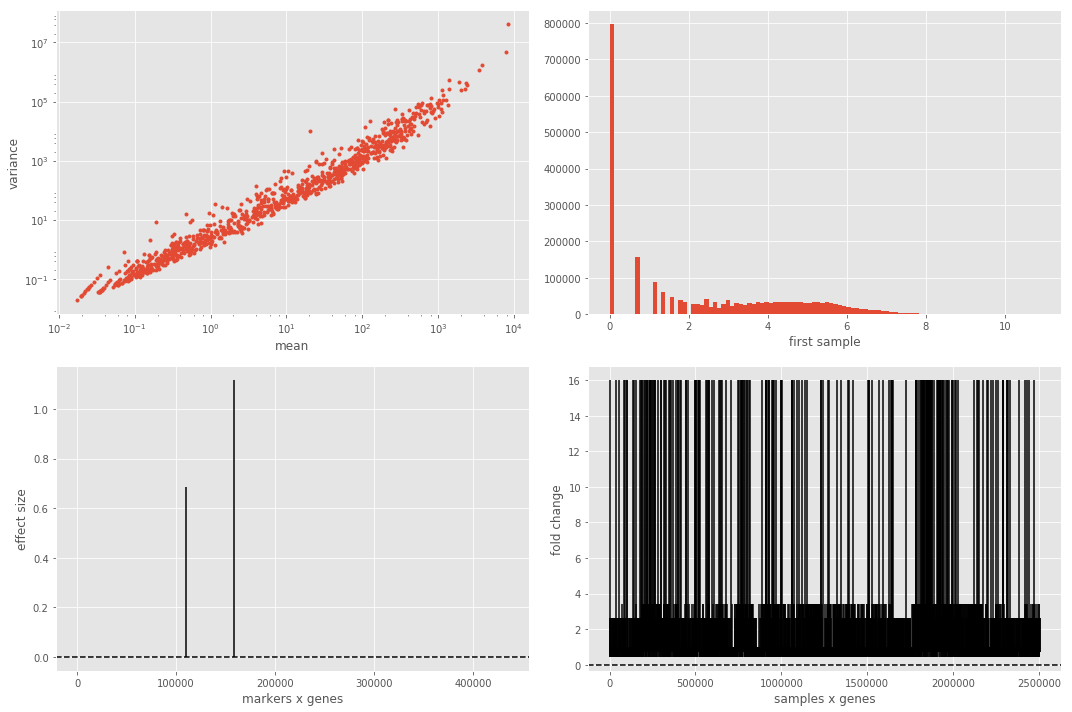

In [25]:
def fcn2(n_samples=2504, n_genes=1000, idxs_eQTLs=[75, 225], n_genes_hot=1, size=16):
    n_samples_max, n_markers = GENO.shape
    n_genes_max, _ = PARS.shape

    assert n_samples <= n_samples_max
    assert n_genes <= n_genes_max
    
    G = GENO[:n_samples,:n_markers]
    
    idxs = _rnd.choice(n_genes_max, n_genes, replace=False)
    mu = PARS['mu'].values[idxs]
    phi = PARS['phi'].values[idxs]
    
    pheno = _assoc.simulate_eQTLs_alt(G, mu, phi, idxs_eQTLs=idxs_eQTLs, n_genes_hot=n_genes_hot, size=size)

    _plt.figure(figsize = (15,10));
    _plt.subplot(2,2,1); _plt.loglog(pheno['mu'], pheno['mu'] + pheno['mu']**2 * pheno['phi'], '.'); _plt.xlabel('mean'); _plt.ylabel('variance');
    _plt.subplot(2,2,2); _plt.hist(_nmp.log(pheno['Z'].ravel()+1), 100); _plt.xlabel('first sample');
    _plt.subplot(2,2,3); _plt.vlines(range(pheno['beta'].size), 0, pheno['beta'].ravel()); 
    _plt.axhline(linestyle='--', color='k'); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
    G_norm = (G - _nmp.mean(G, 0)) / _nmp.std(G, 0)
    tmp = _nmp.exp(G_norm.dot(pheno['beta'].T))
    _plt.subplot(2,2,4); _plt.vlines(range(tmp.size), 1, tmp.ravel()); 
    _plt.axhline(linestyle='--', color='k'); _plt.xlabel('samples x genes'); _plt.ylabel('fold change')

    _plt.tight_layout()
    
    return {'G': G, **pheno}

##
data = fcn2()

In [26]:
with open('../data/simdata_correlated.pkl', 'wb') as fh:
    _pkl.dump(data, fh)

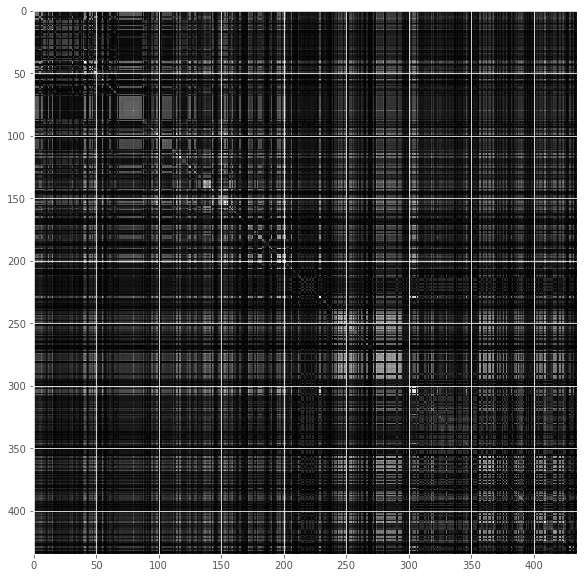

In [12]:
_plt.figure(figsize=(10,10)); _plt.imshow(GENO.T.dot(GENO), cmap=_plt.cm.gray);

In [27]:
GENO.shape

(2504, 435)